## Python 5MT Analytics Challenge

### In the past few decades, a lot of efforts have been put by the policy makers and NGOs to solve the inequality and poverty in the globe. However, in the least developed countries, inequality persists and large disparities remain regarding access to health, education services and other assets.
### This analysis is aimed at exploring the correlation between inequality and poverty in the least developed countries, and is intended to help development actors, citizens, and policy makers understand how they could address inequality in different aspects, to reduce poverty in those countries.

### 2-3 variables representing inequality in following categories will be explored in this analysis, and the most appropriate varaibles in each category will be selected to build the predictive model.
#### 1. Gender Inequality
#### 2. Wealth Inequality
#### 3. Social Resource Inequality 
#### 4. Education Inequality

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('WDIdata3decades.xlsx', dtype='object')
pd.set_option('display.max_rows', None)

In [3]:
df

,Custom_Time_Code,Country Code,PA.NUS.PPP.05,PA.NUS.PRVT.PP.05,EG.CFT.ACCS.ZS,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,FX.OWN.TOTL.ZS,FX.OWN.TOTL.FE.ZS,...,SG.DMK.ALLD.FN.ZS,SG.VAW.REAS.ZS,SG.VAW.ARGU.ZS,SG.VAW.BURN.ZS,SG.VAW.GOES.ZS,SG.VAW.NEGL.ZS,SG.VAW.REFU.ZS,SP.M15.2024.FE.ZS,SP.M18.2024.FE.ZS,SH.DYN.AIDS.FE.ZS
0,1990s,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.8
1,1990s,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.07
2,1990s,BDI,NaN,NaN,NaN,3.32994,NaN,55.5875,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.68
3,1990s,BEN,NaN,NaN,NaN,17.1799,3.09088,40.5923,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.8,38.8,52.57
4,1990s,BFA,NaN,NaN,NaN,6.54537,0.943943,35.8436,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.75,62,47.59
5,1990s,BGD,NaN,NaN,NaN,20.0502,6.09693,71.3626,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47,70.9,27.34
6,1990s,BOL,NaN,NaN,NaN,64.5456,21.3062,95.0726,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.65,23.05,28.08
7,1990s,BTN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.03
8,1990s,CAF,NaN,NaN,NaN,3.88279,0.0235562,10.6159,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.6,57,54
9,1990s,CIV,NaN,NaN,NaN,41.3724,17.6347,75.4711,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.3,38.35,53.98


In [4]:
df_2= df[['Custom_Time_Code','Country Code','NY.GDP.MKTP.CD','NY.GDP.MKTP.KD.ZG','NY.GDP.PCAP.CD','SI.POV.DDAY', 'SI.POV.GINI','IQ.CPA.GNDR.XQ','per_si_allsi.cov_pop_tot','SE.PRM.ENRR','SI.DST.10TH.10','SE.PRM.UNER.ZS','SE.PRM.UNER.FE.ZS','SE.PRM.UNER.MA.ZS','per_lm_alllm.cov_pop_tot','SL.EMP.TOTL.SP.NE.ZS','IQ.CPA.PROT.XQ','IQ.CPA.SOCI.XQ','SH.H2O.BASW.RU.ZS','SH.H2O.BASW.UR.ZS','SH.STA.BASS.RU.ZS','SH.STA.BASS.UR.ZS','SI.DST.05TH.20',"SI.DST.FRST.20",'EG.ELC.ACCS.RU.ZS','EG.ELC.ACCS.UR.ZS']]

In [5]:
df_2.rename(columns={"NY.GDP.MKTP.CD": "GDP(US$)","NY.GDP.MKTP.KD.ZG":"GDP_annual_growth", "NY.GDP.PCAP.CD":"GDP_per_capita_US_dollar","SI.POV.DDAY": "Poverty_headcount_$1.90_a_day","SI.POV.GINI":"GINI_Index","IQ.CPA.GNDR.XQ":"Gender_equality_rating","per_si_allsi.cov_pop_tot":"Coverage_Social_Insurance","SE.PRM.ENRR":"School_enrollment_percentage","SI.DST.05TH.20":"Income_share_held_by_highest20","SI.DST.FRST.20":"Income_share_held_by_lowest20","SE.PRM.UNER.ZS":"Children_out_of_school","SE.PRM.UNER.FE.ZS":"Female_children_out_of_school","SE.PRM.UNER.MA.ZS":"Male_children_out_of_school","per_lm_alllm.cov_pop_tot":"Coverage_unemployment_benefits","SL.EMP.TOTL.SP.NE.ZS":"Employment_to_population_ratio","IQ.CPA.PROT.XQ":"CPIA_social_protection_rating","IQ.CPA.SOCI.XQ":"CPIA_social_equity_rating","SH.H2O.BASW.RU.ZS":"People_using_basic_water_service_rural","SH.H2O.BASW.UR.ZS":"People_using_basic_water_service_urban",'SH.STA.BASS.RU.ZS':"People_using_sanitation_service_rural","SH.STA.BASS.UR.ZS":"People_using_sanitation_service_urban","EG.ELC.ACCS.RU.ZS":"Access_to_electricity_rural","EG.ELC.ACCS.UR.ZS":"Access_to_electricity_urban"},inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [6]:
df_2

,Custom_Time_Code,Country Code,GDP(US$),GDP_annual_growth,GDP_per_capita_US_dollar,Poverty_headcount_$1.90_a_day,GINI_Index,Gender_equality_rating,Coverage_Social_Insurance,School_enrollment_percentage,...,CPIA_social_protection_rating,CPIA_social_equity_rating,People_using_basic_water_service_rural,People_using_basic_water_service_urban,People_using_sanitation_service_rural,People_using_sanitation_service_urban,Income_share_held_by_highest20,Income_share_held_by_lowest20,Access_to_electricity_rural,Access_to_electricity_urban
0,1990s,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990s,AGO,7.37201e+09,1.17502,548.513,NaN,NaN,NaN,NaN,68.9058,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990s,BDI,9.79041e+08,-1.43333,166.996,82.6,37.8,NaN,NaN,55.9012,...,NaN,NaN,NaN,NaN,NaN,NaN,44.8,6.5,NaN,55.5875
3,1990s,BEN,2.14583e+09,4.94228,368.798,NaN,NaN,NaN,NaN,68.2578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.09088,40.5923
4,1990s,BFA,2.59163e+09,5.1236,261.229,82.35,49,NaN,NaN,37.8138,...,NaN,NaN,NaN,NaN,NaN,NaN,55.8,5.3,0.943943,35.8436
5,1990s,BGD,3.95078e+10,4.71331,343.578,39.95,30.25,NaN,NaN,83.797,...,NaN,NaN,NaN,NaN,NaN,NaN,39.9,9.2,6.09693,71.3626
6,1990s,BOL,6.63912e+09,3.99354,872.778,17.2333,52.7667,NaN,NaN,111.677,...,NaN,NaN,NaN,NaN,NaN,NaN,56.8,2.96667,21.3062,95.0726
7,1990s,BTN,3.0881e+08,5.39185,566.009,NaN,NaN,NaN,NaN,62.165,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1990s,CAF,1.13877e+09,1.29111,364.664,84.3,61.3,NaN,NaN,66.1519,...,NaN,NaN,NaN,NaN,NaN,NaN,65,2,0.0235562,10.6159
9,1990s,CIV,1.11651e+10,2.4466,802.024,22.6,39.6667,NaN,NaN,70.9906,...,NaN,NaN,NaN,NaN,NaN,NaN,46.5333,6.33333,17.6347,75.4711


In [7]:
country_code = pd.read_excel('WDImetadata.xlsx', dtype='object')
pd.set_option('display.max_rows', None)

In [8]:
df_3=pd.merge(df_2,country_code,how='left')

In [9]:
df_3_noUS=df_3[df_3['Country Code']!='USA']

In [10]:
df_1990s=df_3_noUS[df_3_noUS['Custom_Time_Code']=='1990s']
df_2000s=df_3_noUS[df_3_noUS['Custom_Time_Code']=='2000s']
df_2010s=df_3_noUS[df_3_noUS['Custom_Time_Code']=='2010s']

In [11]:
df_1990s.sort_values('GDP_per_capita_US_dollar',ascending=False,inplace=True)
df_2000s.sort_values('GDP_per_capita_US_dollar',ascending=False,inplace=True)
df_2010s.sort_values('GDP_per_capita_US_dollar',ascending=False,inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we c

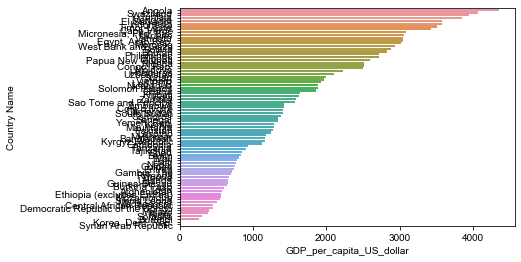

In [12]:
ax= sns.barplot(x="GDP_per_capita_US_dollar", y="Country Name", data=df_2010s)
sns.set(rc={'figure.figsize':(10,18)})
plt.savefig('GDP_Per_Capita.png')

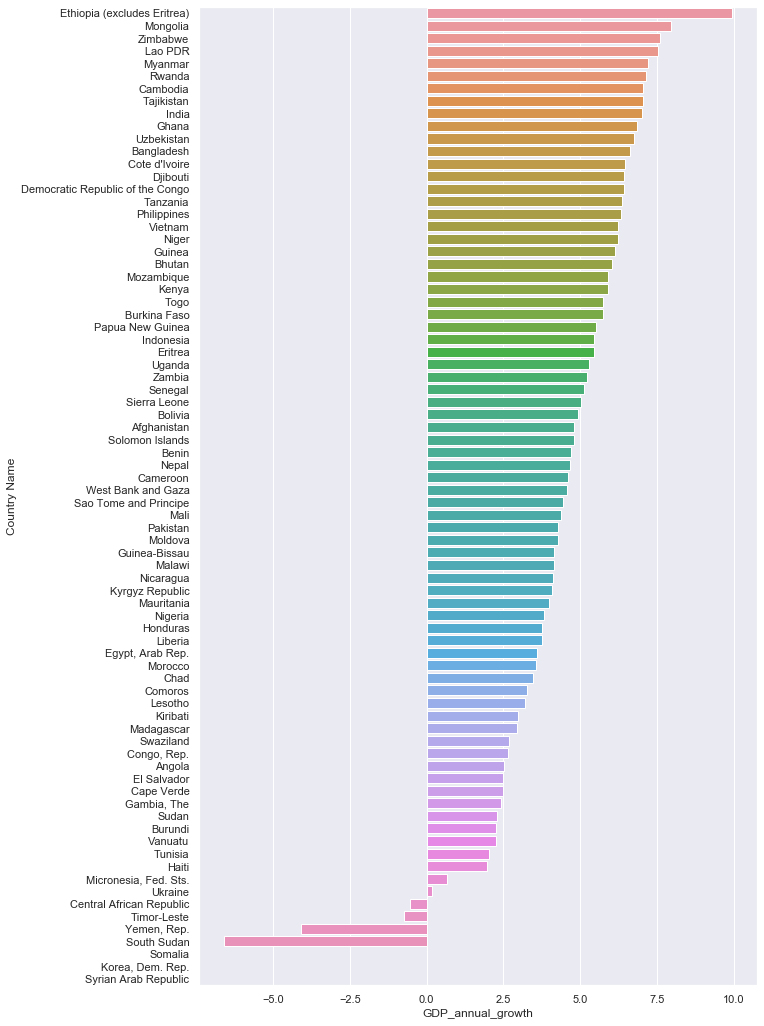

In [13]:
ax= sns.barplot(x="GDP_annual_growth", y="Country Name", data=df_2010s.sort_values('GDP_annual_growth',ascending=False))
sns.set(rc={'figure.figsize':(10,18)})

In [14]:
df_3['Poverty_headcount_$1.90_a_day']=df_3['Poverty_headcount_$1.90_a_day'].astype('float')
df_3_noUS['Poverty_headcount_$1.90_a_day']=df_3['Poverty_headcount_$1.90_a_day'].astype('float')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
df_3['GDP_per_capita_US_dollar']=df_3['GDP_per_capita_US_dollar'].astype('float')
df_3_noUS['GDP_per_capita_US_dollar']=df_3['GDP_per_capita_US_dollar'].astype('float')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
df_3['Non_US_Country']= 'Non US'

In [17]:
df_3.loc[df_3['Country Code']=='USA', 'Non_US_Country']= 'US'

In [18]:
df_3

,Custom_Time_Code,Country Code,GDP(US$),GDP_annual_growth,GDP_per_capita_US_dollar,Poverty_headcount_$1.90_a_day,GINI_Index,Gender_equality_rating,Coverage_Social_Insurance,School_enrollment_percentage,...,People_using_basic_water_service_rural,People_using_basic_water_service_urban,People_using_sanitation_service_rural,People_using_sanitation_service_urban,Income_share_held_by_highest20,Income_share_held_by_lowest20,Access_to_electricity_rural,Access_to_electricity_urban,Country Name,Non_US_Country
0,1990s,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,Non US
1,1990s,AGO,7.37201e+09,1.17502,548.512909,NaN,NaN,NaN,NaN,68.9058,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angola,Non US
2,1990s,BDI,9.79041e+08,-1.43333,166.996155,82.600000,37.8,NaN,NaN,55.9012,...,NaN,NaN,NaN,NaN,44.8,6.5,NaN,55.5875,Burundi,Non US
3,1990s,BEN,2.14583e+09,4.94228,368.798181,NaN,NaN,NaN,NaN,68.2578,...,NaN,NaN,NaN,NaN,NaN,NaN,3.09088,40.5923,Benin,Non US
4,1990s,BFA,2.59163e+09,5.1236,261.229474,82.350000,49,NaN,NaN,37.8138,...,NaN,NaN,NaN,NaN,55.8,5.3,0.943943,35.8436,Burkina Faso,Non US
5,1990s,BGD,3.95078e+10,4.71331,343.577554,39.950000,30.25,NaN,NaN,83.797,...,NaN,NaN,NaN,NaN,39.9,9.2,6.09693,71.3626,Bangladesh,Non US
6,1990s,BOL,6.63912e+09,3.99354,872.778313,17.233333,52.7667,NaN,NaN,111.677,...,NaN,NaN,NaN,NaN,56.8,2.96667,21.3062,95.0726,Bolivia,Non US
7,1990s,BTN,3.0881e+08,5.39185,566.008866,NaN,NaN,NaN,NaN,62.165,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bhutan,Non US
8,1990s,CAF,1.13877e+09,1.29111,364.664032,84.300000,61.3,NaN,NaN,66.1519,...,NaN,NaN,NaN,NaN,65,2,0.0235562,10.6159,Central African Republic,Non US
9,1990s,CIV,1.11651e+10,2.4466,802.024408,22.600000,39.6667,NaN,NaN,70.9906,...,NaN,NaN,NaN,NaN,46.5333,6.33333,17.6347,75.4711,Cote d'Ivoire,Non US


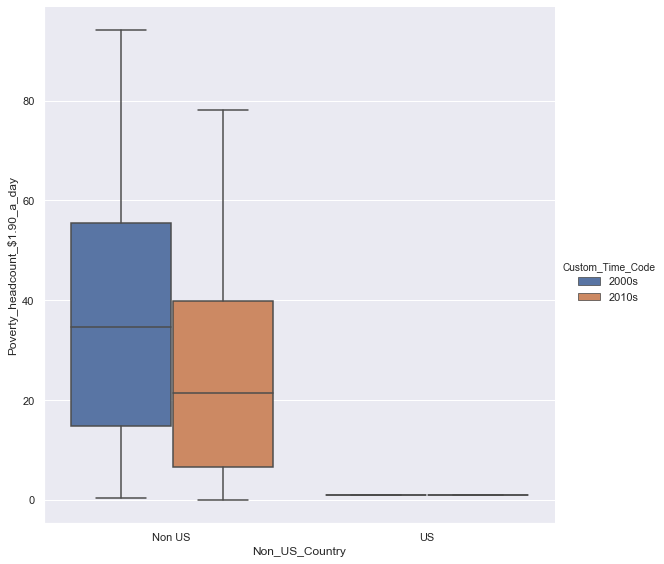

In [19]:
povertyplot = sns.catplot(y='Poverty_headcount_$1.90_a_day',x= 'Non_US_Country', kind='box',
                                          data=df_3[df_3['Custom_Time_Code']!='1990s'], height=8, aspect=8/8, 
                                          order=['Non US','US'],
                                          hue='Custom_Time_Code',hue_order=['2000s', '2010s'])

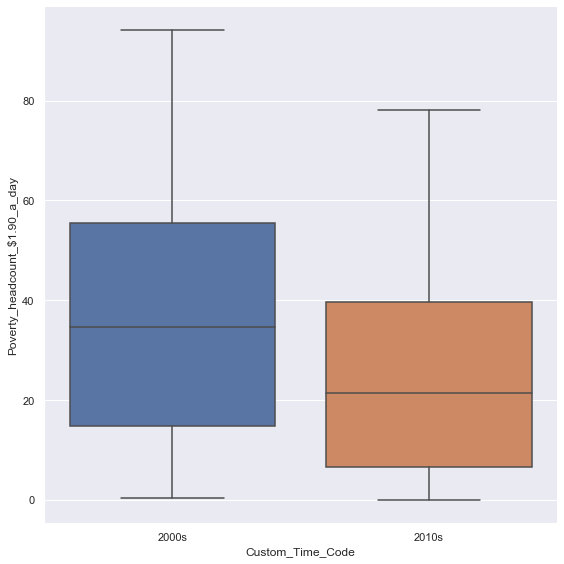

In [20]:
povertyplot = sns.catplot(y='Poverty_headcount_$1.90_a_day',x= 'Custom_Time_Code', kind='box',
                                          data=df_3_noUS[df_3_noUS['Custom_Time_Code']!='1990s'], height=8, aspect=8/8, 
                                         )

<Mark>Interpretation:</Mark> In those least developed countries, the percentage of poverty headcount below $1.90 a day is much higher than that number in the US.

In [21]:
df_3_noUS[df_3_noUS['Custom_Time_Code']=='2000s']['Poverty_headcount_$1.90_a_day'].mean()

36.70871578099838

In [22]:
df_3[(df_3['Custom_Time_Code']=='2000s') & (df_3['Country Code']=='USA')]['Poverty_headcount_$1.90_a_day'].mean()

0.9

In [23]:
df_3_noUS[df_3_noUS['Custom_Time_Code']=='2010s']['Poverty_headcount_$1.90_a_day'].mean()

27.185261514441844

In [24]:
df_3[(df_3['Custom_Time_Code']=='2010s') & (df_3['Country Code']=='USA')]['Poverty_headcount_$1.90_a_day'].mean()

1.0666666666666667

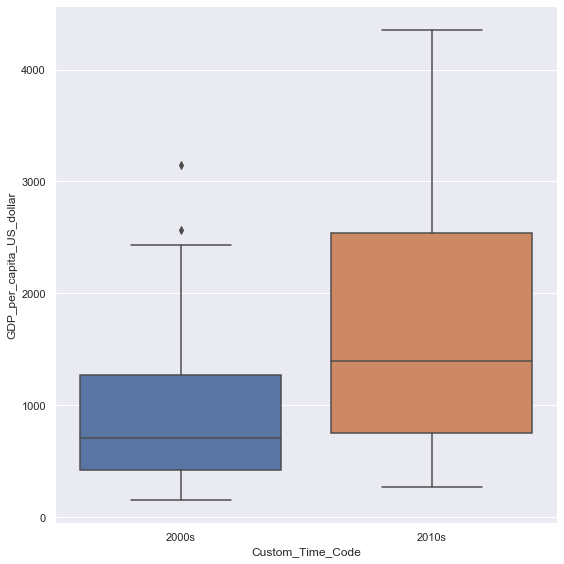

In [25]:
GDPplot = sns.catplot(y='GDP_per_capita_US_dollar',x='Custom_Time_Code' ,kind='box',
                                          data=df_3_noUS[df_3_noUS['Custom_Time_Code']!='1990s'], height=8, aspect=8/8, 
                                          )

In [26]:
df_3_noUS[df_3_noUS['Custom_Time_Code']=='2000s']['GDP_per_capita_US_dollar'].mean()

918.1709375941455

In [27]:
df_3[(df_3['Custom_Time_Code']=='2000s') & (df_3['Country Code']=='USA')]['GDP_per_capita_US_dollar'].mean()

42657.258546084435

In [28]:
df_3_noUS[df_3_noUS['Custom_Time_Code']=='2010s']['GDP_per_capita_US_dollar'].mean()

1693.0735488422636

In [29]:
df_3[(df_3['Custom_Time_Code']=='2010s') & (df_3['Country Code']=='USA')]['GDP_per_capita_US_dollar'].mean()

55058.165807693

<Mark>Interpretation:</Mark> In those least developed countries,the average GDP per capita is much lower than that of USA - USD918 VS USD42657 in 2000s / USD1693 VS USD55058 in 2010s

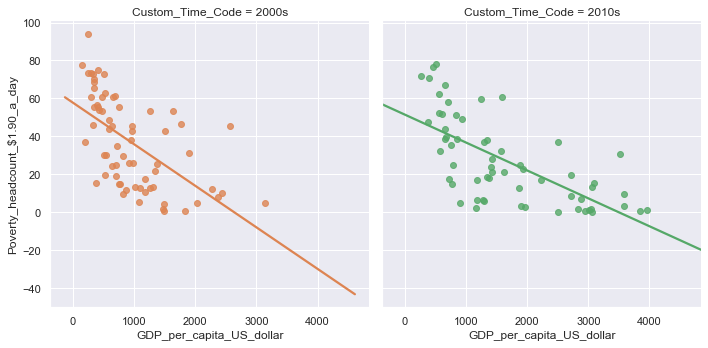

In [30]:
sns.lmplot(x="GDP_per_capita_US_dollar", y="Poverty_headcount_$1.90_a_day",hue=('Custom_Time_Code'),col='Custom_Time_Code',col_order=['2000s','2010s'], data=df_3_noUS, order=1, ci=None)

<Mark>Interpretation:</Mark> Those two graphs show that as GDP_per_capita increases, the percentage of poverty headcount below $1.90 a day would decrease.

## Part I: Exploratory Analysis - Select 2-3 variables representing inequality in different categories to explore the correlation between those variables and Poverty(Poverty_headcount_$1.90_a_day)

### 1. Gender Inequality VS Poverty

#### Variable 1: Gender_equality_rating (1=low to 6=high)
#### (CPIA Gender equality assesses the extent to which the country has installed institutions and programs to enforce laws and policies that promote equal access for men and women in education, health, the economy, and protection under law.)

In [31]:
df_3_noUS['Gender_equality_rating']=df_3_noUS['Gender_equality_rating'].astype('float')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
df_3_noUS[df_3_noUS['Custom_Time_Code']=='2010s']['Gender_equality_rating'].describe()

count    67.000000
mean      3.261697
std       0.668056
min       1.666667
25%       2.861111
50%       3.250000
75%       3.805556
max       4.666667
Name: Gender_equality_rating, dtype: float64

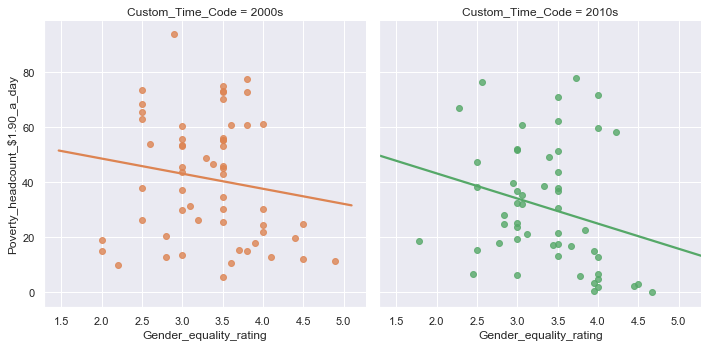

In [33]:
sns.lmplot(x="Gender_equality_rating", y="Poverty_headcount_$1.90_a_day",hue=('Custom_Time_Code'),col='Custom_Time_Code',col_order=['2000s','2010s'], data=df_3_noUS, order=1, ci=None)

In [34]:
df_3_noUS['Gender_equality_rating'][df_3_noUS['Custom_Time_Code']!='1990s'].isnull().sum()

25

<Mark>Interpretation:</Mark> There is obvious negative correlation between Gender equality rating and Poverty_headcount_$1.90_a_day, which means as gender equaliy increases, poverty will reduce in a country.

#### Variable 2: Difference between Female_children_out_of_school_% and Male_children_out_of_school_% 
#### (Children_out_of_school_% = The percentage of primary-school-age children who are not enrolled in primary or secondary school). The bigger the difference is, the bigger the gender inequality is in the country.)

In [35]:
df_3_noUS['Female_children_out_of_school']=df_3_noUS['Female_children_out_of_school'].astype('float')
df_3_noUS['Male_children_out_of_school']=df_3_noUS['Male_children_out_of_school'].astype('float')
df_3_noUS['Difference_gender_out_of_school'] = df_3_noUS['Female_children_out_of_school']-df_3_noUS['Male_children_out_of_school']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [36]:
df_3_noUS[df_3_noUS['Custom_Time_Code']=='2000s']['Difference_gender_out_of_school'].describe()

count    65.000000
mean      4.370968
std       6.561404
min      -5.188630
25%      -0.335280
50%       1.244723
75%       8.635230
max      21.029550
Name: Difference_gender_out_of_school, dtype: float64

In [37]:
df_3_noUS[df_3_noUS['Custom_Time_Code']=='2010s']['Difference_gender_out_of_school'].describe()

count    65.000000
mean      2.358893
std       5.696947
min      -6.256776
25%      -1.362434
50%       0.374974
75%       4.837034
max      19.084997
Name: Difference_gender_out_of_school, dtype: float64

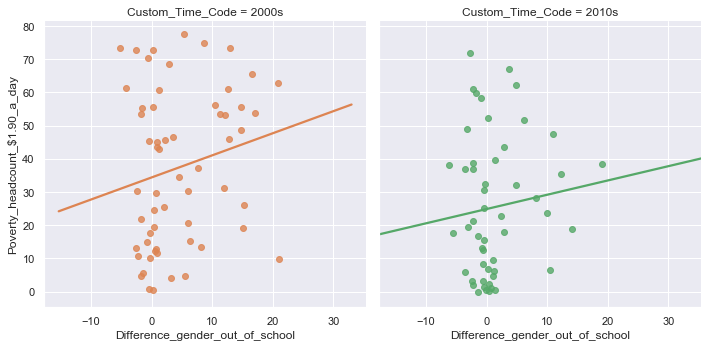

In [38]:
sns.lmplot(x="Difference_gender_out_of_school", y="Poverty_headcount_$1.90_a_day",hue=('Custom_Time_Code'),col='Custom_Time_Code',col_order=['2000s','2010s'], data=df_3_noUS, order=1, ci=None)

In [39]:
df_3_noUS['Difference_gender_out_of_school'][(df_3_noUS['Custom_Time_Code']=='2000s') | (df_3_noUS['Custom_Time_Code']=='2010s')].isnull().sum()

26

<Mark>Interpretation:</Mark> The plots are showing positive correlation between such difference with Poverty_headcount_$1.90_a_day, which means as gender inequality increase, Poverty population in the country will also increase.

### 2. Wealth Inequality VS Poverty

#### Variable 1: GINI_Index  
#### (Gini index measures the extent to which the distribution of income (or, in some cases, consumption expenditure) among individuals or households within an economy deviates from a perfectly equal distribution. A Lorenz curve plots the cumulative percentages of total income received against the cumulative number of recipients, starting with the poorest individual or household. The Gini index measures the area between the Lorenz curve and a hypothetical line of absolute equality, expressed as a percentage of the maximum area under the line. Thus a Gini index of 0 represents perfect equality, while an index of 100 implies perfect inequality.)

In [40]:
df_3_noUS['GINI_Index']=df_3_noUS['GINI_Index'].astype('float')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
df_3_noUS[df_3_noUS['Custom_Time_Code']=='2000s']['GINI_Index'].describe()

count    69.000000
mean     40.825205
std       6.762378
min      28.037500
25%      35.380000
50%      40.200000
75%      46.300000
max      56.344444
Name: GINI_Index, dtype: float64

In [42]:
df_3_noUS[df_3_noUS['Custom_Time_Code']=='2010s']['GINI_Index'].describe()

count    61.000000
mean     39.370907
std       6.894099
min      24.742857
25%      34.100000
50%      38.925000
75%      43.600000
max      56.350000
Name: GINI_Index, dtype: float64

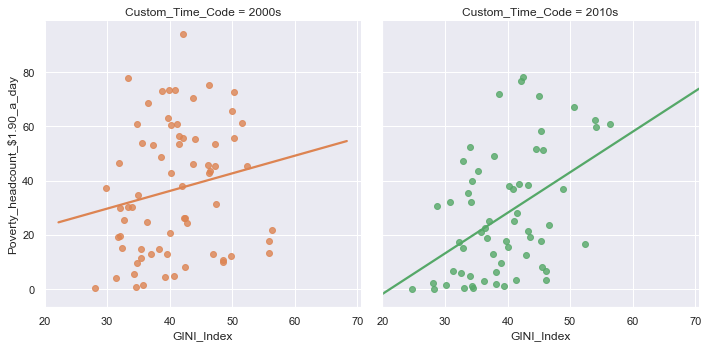

In [43]:
sns.lmplot(x="GINI_Index", y="Poverty_headcount_$1.90_a_day", hue=('Custom_Time_Code'),col='Custom_Time_Code',col_order=['2000s','2010s'],data=df_3_noUS, order=1, ci=None)

In [44]:
df_3_noUS['GINI_Index'][(df_3_noUS['Custom_Time_Code']=='2000s') | (df_3_noUS['Custom_Time_Code']=='2010s')].isnull().sum()

26

<Mark>Interpretation:</Mark> The plots are showing positive correlation between GINI Index and Poverty population, which means as income inequality increases, poverty population will increase too.

#### Variable 2: Difference between Income_share_held_by_highest_20% and Income_share_held_by_lowest_20%
#### (Percentage share of income or consumption is the share that accrues to subgroups of population indicated by deciles or quintiles. Percentage shares by quintile may not sum to 100 because of rounding.)

In [45]:
df_3_noUS['Income_share_held_by_highest20']=df_3_noUS['Income_share_held_by_highest20'].astype('float')
df_3_noUS['Income_share_held_by_lowest20']=df_3_noUS['Income_share_held_by_lowest20'].astype('float')
df_3_noUS['Difference_Income_share_between_highest20_lowest20'] = df_3_noUS['Income_share_held_by_highest20']-df_3_noUS['Income_share_held_by_lowest20']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [46]:
df_3_noUS[df_3_noUS['Custom_Time_Code']=='2000s']['Difference_Income_share_between_highest20_lowest20'].describe()

count    69.000000
mean     41.481469
std       7.028686
min      28.212500
25%      35.600000
50%      41.200000
75%      47.000000
max      57.533333
Name: Difference_Income_share_between_highest20_lowest20, dtype: float64

In [47]:
df_3_noUS[df_3_noUS['Custom_Time_Code']=='2010s']['Difference_Income_share_between_highest20_lowest20'].describe()

count    61.000000
mean     39.973052
std       7.151919
min      24.857143
25%      34.600000
50%      39.400000
75%      44.433333
max      57.850000
Name: Difference_Income_share_between_highest20_lowest20, dtype: float64

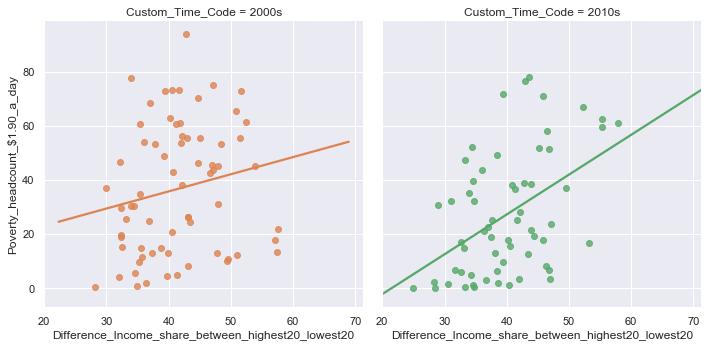

In [48]:
sns.lmplot(x="Difference_Income_share_between_highest20_lowest20", y="Poverty_headcount_$1.90_a_day", hue=('Custom_Time_Code'),col='Custom_Time_Code',col_order=['2000s','2010s'],data=df_3_noUS, order=1, ci=None)

In [49]:
df_3_noUS['Difference_Income_share_between_highest20_lowest20'][(df_3_noUS['Custom_Time_Code']=='2000s') | (df_3_noUS['Custom_Time_Code']=='2010s')].isnull().sum()

26

<Mark>Interpretation:</Mark> The plots show positive correlation between Difference_Income_share_between_highest20_lowest20 and Poverty_headcount_$1.90_a_day, which means as income inequality increases, poverty population will increase too.

### 3. Social Resource Inequality VS Poverty

#### Variable 1: Difference between the percentage of people using basic drinking water services in urban and rural areas
#### (The percentage of people using at least basic water services.  This indicator encompasses both people using basic water services as well as those using safely managed water services. The larger the difference is, the higher degree of inequaliy exists between urban and rural areas)

In [50]:
df_3_noUS['People_using_basic_water_service_urban']=df_3_noUS['People_using_basic_water_service_urban'].astype('float')
df_3_noUS['People_using_basic_water_service_rural']=df_3_noUS['People_using_basic_water_service_rural'].astype('float')
df_3_noUS['Difference_people_using_basic_water_service_urban_rural'] = df_3_noUS['People_using_basic_water_service_urban']- df_3_noUS['People_using_basic_water_service_rural']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

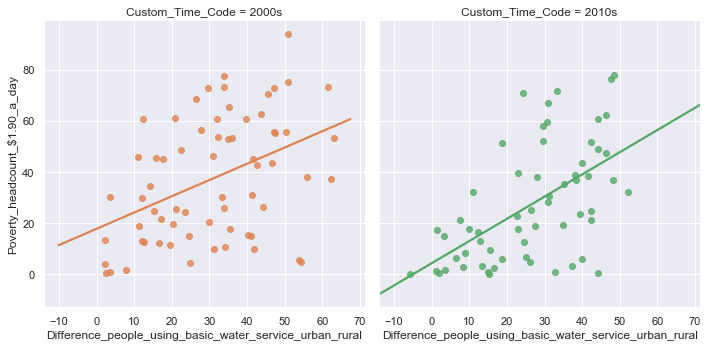

In [51]:
sns.lmplot(x="Difference_people_using_basic_water_service_urban_rural", y="Poverty_headcount_$1.90_a_day", data=df_3_noUS, hue=('Custom_Time_Code'),col='Custom_Time_Code',col_order=['2000s','2010s'],order=1, ci=None)

In [52]:
df_3_noUS['Difference_people_using_basic_water_service_urban_rural'][df_3_noUS['Custom_Time_Code']!='1990s'].isnull().sum()

5

<Mark>Interpretation:</Mark> The plots are showing positive correlation between such difference and Poverty_headcount_$1.90_a_day, which means the higher the inequality level in such resource is, the higher the poverty level is in a country.

#### Variable 2: Difference between the percentage of people using sanitation services in urban and rural areas
#### (The percentage of people using at least basic sanitation services, that is, improved sanitation facilities that are not shared with other households.  This indicator encompasses both people using basic sanitation services as well as those using safely managed sanitation services.   Improved sanitation facilities include flush/pour flush to piped sewer systems, septic tanks or pit latrines; ventilated improved pit latrines, compositing toilets or pit latrines with slabs. The larger the difference is, the higher degree of inequaliy exists between urban and rural areas)

In [53]:
df_3_noUS['People_using_sanitation_service_urban']=df_3_noUS['People_using_sanitation_service_urban'].astype('float')
df_3_noUS['People_using_sanitation_service_rural']=df_3_noUS['People_using_sanitation_service_rural'].astype('float')
df_3_noUS['Difference_people_using_sanitation_service_urban_rural'] = df_3_noUS['People_using_sanitation_service_urban']- df_3_noUS['People_using_sanitation_service_rural']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

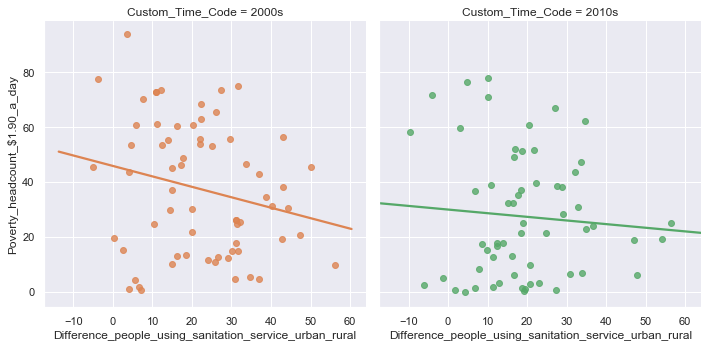

In [54]:
sns.lmplot(x="Difference_people_using_sanitation_service_urban_rural", y="Poverty_headcount_$1.90_a_day", data=df_3_noUS, hue=('Custom_Time_Code'),col='Custom_Time_Code',col_order=['2000s','2010s'],order=1, ci=None)

<Mark>Interpretation:</Mark> The plots are showing negative correlation between such difference and Poverty_headcount_$1.90_a_day, which means the higher the inequality level in such resource is, the lower the Poverty level is in a country. This outcome contradicts with common sense.

### 4. Education Inequality VS Poverty

#### Variable 1: School_enrollment_percentage 
#### (The ratio of total enrollment, regardless of age, to the population of the age group that officially corresponds to the level of education shown. Primary education provides children with basic reading, writing, and mathematics skills along with an elementary understanding of such subjects as history, geography, natural science, social science, art, and music)

In [55]:
df_3_noUS['School_enrollment_percentage']=df_3_noUS['School_enrollment_percentage'].astype('float')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


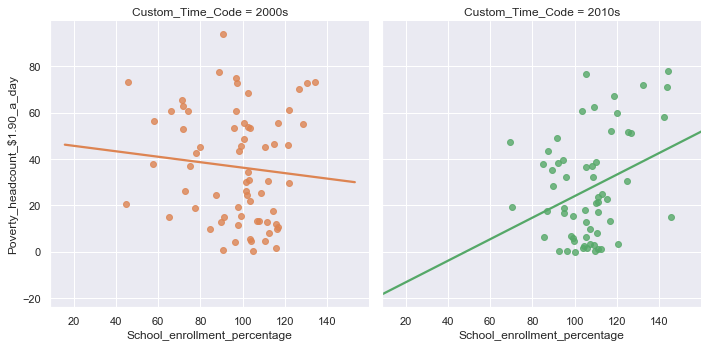

In [56]:
sns.lmplot(x="School_enrollment_percentage", y="Poverty_headcount_$1.90_a_day", data=df_3_noUS, hue=('Custom_Time_Code'),col='Custom_Time_Code',col_order=['2000s','2010s'],order=1, ci=None)

In [57]:
df_3_noUS['School_enrollment_percentage'][(df_3_noUS['Custom_Time_Code']=='2000s') | (df_3_noUS['Custom_Time_Code']=='2010s')].isnull().sum()

4

<Mark>Interpretation:</Mark> The two plots show opposite direction of the correlation between the School enrollment percentage and Poverty level. Further observation is needed for this independent variable.

#### Variable 2: Children_out_of_school_% 
#### (The percentage of primary-school-age children who are not enrolled in primary or secondary school. Children in the official primary age group that are in preprimary education should be considered out of school.)

In [58]:
df_3_noUS['Children_out_of_school']=df_3_noUS['Children_out_of_school'].astype('float')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


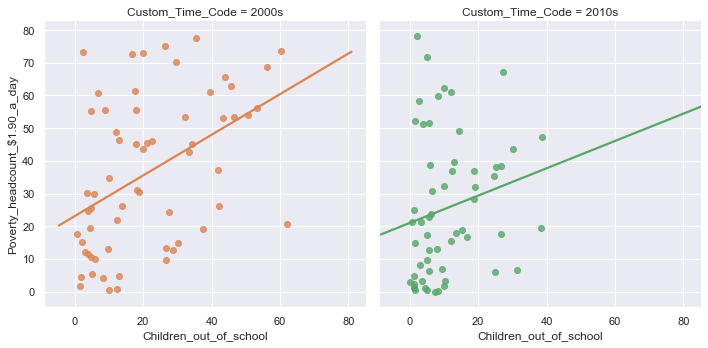

In [59]:
sns.lmplot(x="Children_out_of_school", y="Poverty_headcount_$1.90_a_day", data=df_3_noUS, hue=('Custom_Time_Code'),col='Custom_Time_Code',col_order=['2000s','2010s'],order=1, ci=None)

In [60]:
df_3_noUS['Children_out_of_school'][(df_3_noUS['Custom_Time_Code']=='2000s') | (df_3_noUS['Custom_Time_Code']=='2010s')].isnull().sum()

15

<Mark>Interpretation:</Mark> Both plots are showing positive correlation between the Children_out_of_school_percentage and Poverty, which means the more children at school age are out of school, the higher the Poverty level will be.

## Part II: Predictive Modeling 

#### First step: Use all above independent variables to build the regression model and then remove the variables with high p-value or showing unreasonble coefficient to improve the model
#### Second step: Using Grid Search to fine tune the model
#### Third step: Use the final-selected independent variables to build KNN and Decision Tree model respectively, also implemented the model tuning method.
#### Final step: Compare the RMSEs of all the model built and pick the one with lowest RMSE.

In [61]:
import sklearn.linear_model as sklm

# for KNN:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

#for model evaluation and pre-processing tools:
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, \
                            accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

#for modeling with decision trees:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, \
    RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier

#for model tuning:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

#for plotting confusion matrix:
import scikitplot as skplt

### 1. Regression Model

In [62]:
import statsmodels.formula.api as smf

In [63]:
df4=df_3_noUS[['Poverty_headcount_$1.90_a_day','Gender_equality_rating','Difference_gender_out_of_school','GINI_Index','Difference_Income_share_between_highest20_lowest20','Difference_people_using_basic_water_service_urban_rural','Difference_people_using_sanitation_service_urban_rural', 
                'School_enrollment_percentage','Children_out_of_school']][df_3_noUS['Custom_Time_Code']!='1990s'].dropna().astype('float')

In [64]:
#Remove special symbol in the dependent variable
df4.rename(columns={"Poverty_headcount_$1.90_a_day": "Poverty_Percentage"},inplace=True)

In [65]:
X = df4.drop(['Poverty_Percentage'],axis=1).values
Y = df4['Poverty_Percentage']

In [66]:
# Add all the selected variables to the model and exam the model
formula='Poverty_Percentage ~ Gender_equality_rating + Difference_gender_out_of_school + GINI_Index + Difference_Income_share_between_highest20_lowest20  + Difference_people_using_basic_water_service_urban_rural + Difference_people_using_sanitation_service_urban_rural + School_enrollment_percentage + Children_out_of_school'
model = smf.ols(formula, data=df4) 
povertyreg = model.fit()
povertyreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Poverty_Percentage   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     11.70
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           4.41e-11
Time:                        17:05:00   Log-Likelihood:                -387.94
No. Observations:                  94   AIC:                             793.9
Df Residuals:                      85   BIC:                             816.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
Intercept                                                  -6.9133     28.210     -0.245      0.807     -63.002      49.175
Gender_equality_rating                                     -1.7559      3.768     -0.466      0.642      -9.248       5.737
Difference_gender_out_of_school                             0.2504      0.328      0.763      0.447      -0.402       0.902
GINI_Index                                                -34.0683     10.368     -3.286      0.001     -54.683     -13.454
Difference_Income_share_between_highest20_lowest20         33.2150     10.000      3.322      0.001      13.333      53.097
Difference_people_using_basic_water_service_urban_rural     0.4724      0.123      3.838      0.000       0.228       0.717
Difference_people_using_sanitation_service_urban_rural     -0.4479      0.128     -3.503      0.001      -0.702      -0.194
School_enrollment_percentage                                0.4210      0.152      2.778      0.007       0.120       0.722
Children_out_of_school                                      0.7516      0.181      4.150      0.000       0.392       1.112
==============================================================================
Omnibus:                        1.599   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.450   Jarque-Bera (JB):                1.281
Skew:                          -0.073   Prob(JB):                        0.527
Kurtosis:                       2.447   Cond. No.                     2.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### In order to avoid interations between independent variables, only one variable in each inequality category will be selected in the Final model.  Remove variables with higher p-value or showing counter-intuitive correlation with Poverty.

In [67]:
# Remove 'Gender_equality_rating','GINI_Index','Difference_people_using_sanitation_service_urban_rural','School_enrollment_percentage'
formula='Poverty_Percentage ~ Difference_gender_out_of_school + Difference_Income_share_between_highest20_lowest20  + Difference_people_using_basic_water_service_urban_rural + Children_out_of_school'
model = smf.ols(formula, data=df4) 
povertyreg = model.fit()
povertyreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Poverty_Percentage   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     7.830
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           1.87e-05
Time:                        17:05:01   Log-Likelihood:                -408.68
No. Observations:                  94   AIC:                             827.4
Df Residuals:                      89   BIC:                             840.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
Intercept                                                 -11.9656     11.825     -1.012      0.314     -35.462      11.531
Difference_gender_out_of_school                             0.0340      0.350      0.097      0.923      -0.661       0.729
Difference_Income_share_between_highest20_lowest20          0.6466      0.274      2.363      0.020       0.103       1.190
Difference_people_using_basic_water_service_urban_rural     0.4694      0.149      3.156      0.002       0.174       0.765
Children_out_of_school                                      0.3544      0.151      2.352      0.021       0.055       0.654
==============================================================================
Omnibus:                        3.837   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                2.450
Skew:                           0.194   Prob(JB):                        0.294
Kurtosis:                       2.311   Cond. No.                         337.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The final model : Poverty_Percentage ~ Difference_gender_out_of_school + Difference_Income_share_between_highest20_lowest20  + Difference_people_using_basic_water_service_urban_rural + Children_out_of_school'


In [68]:
X1 = df4[['Difference_gender_out_of_school','Difference_Income_share_between_highest20_lowest20','Difference_people_using_basic_water_service_urban_rural','Children_out_of_school']].values

In [69]:
Y1 = df4['Poverty_Percentage']

In [70]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.25, random_state=7)
print(X1_train.shape, Y1_train.shape)
print(X1_test.shape, Y1_test.shape)

(70, 4) (70,)
(24, 4) (24,)


In [71]:
povertyreg=sklm.LinearRegression()
povertyreg.fit(X1_train, Y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
povertyreg.fit(X1_train, Y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
# How good is the model if subjected to variations in the training sample?
# This is 5-fold cross validation
cvparam = KFold(5, random_state=13)
scores_mse_lm =  cross_validate(povertyreg, X1_train, Y1_train, cv=cvparam, scoring='neg_mean_squared_error')

In [74]:
np.sqrt(scores_mse_lm['test_score'].mean()*-1)

20.571960768685702

<Mark>Interpretation:</Mark> Here, the 5-fold cross-validation reveals that the model is deviant from reality by about 20%.

In [75]:
#how good is the out-of-training-sample (i.e., the test) prediction of the trained model?

lm_predictions_tt=povertyreg.predict(X1_test) #use test sample and coefficients derived from trained model
np.sqrt(np.square(lm_predictions_tt-Y1_test).mean()) #compare predictions with actual values in test sample

18.20070734859441

<Mark>Interpretation:</Mark> This model is deviant from the actual values by about 18.2%, on average, when using the test data. 

#### Tuning Regression Model

In [76]:
#Get Polynomial Features
poly_features = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

In [77]:
X_poly = poly_features.fit_transform(X1)

In [78]:
poly_features_int = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

In [79]:
X_poly_int=poly_features_int.fit_transform(X1)

In [80]:
X_poly_int[1]

array([   5.321874  ,   34.        ,   33.98214978,   35.371491  ,
        180.943716  ,  180.84871938,  188.24261829, 1155.39309252,
       1202.630694  , 1201.9993051 ])

In [81]:
#Grid Search
def PolyReg(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), sklm.LinearRegression(**kwargs))

In [82]:
# set the gridsearch parameter: search from degrees 0 through 7:

param_grid={'polynomialfeatures__degree': np.arange(5)}

In [83]:
# define the gridsearch:

poly_grid = GridSearchCV(PolyReg(), param_grid, cv=5, scoring='neg_mean_squared_error')

In [84]:
#fit the gridsearch:

poly_grid.fit(X1_train, Y1_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'polynomialfeatures__degree': array([0, 1, 2, 3, 4])},
             pre_di

In [85]:
#get the cross validation results from the gridsearch:

poly_grid.cv_results_

{'mean_fit_time': array([0.00120158, 0.00135818, 0.00278225, 0.00336318, 0.00294952]),
 'std_fit_time': array([0.00024332, 0.00029778, 0.001621  , 0.00264097, 0.00074852]),
 'mean_score_time': array([0.00089879, 0.00048456, 0.00079594, 0.00113573, 0.00138512]),
 'std_score_time': array([9.43180300e-04, 6.43916633e-05, 7.54579699e-05, 1.68468370e-04,
        1.64936353e-04]),
 'param_polynomialfeatures__degree': masked_array(data=[0, 1, 2, 3, 4],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'polynomialfeatures__degree': 0},
  {'polynomialfeatures__degree': 1},
  {'polynomialfeatures__degree': 2},
  {'polynomialfeatures__degree': 3},
  {'polynomialfeatures__degree': 4}],
 'split0_test_score': array([-5.27760249e+02, -4.17823382e+02, -4.80776494e+02, -2.48468640e+03,
        -4.66427002e+05]),
 'split1_test_score': array([   -666.3248795 ,    -599.65462231,    -557.78717201,
         -23142.39217097, -330415.38047

In [86]:
#Mean negative-MSE scores across the different runs of the CV:
poly_grid.cv_results_['mean_test_score']

array([-5.18445252e+02, -4.23205570e+02, -4.58732169e+02, -8.37670726e+03,
       -4.72473597e+05])

In [87]:
#which degree gave the best results?

poly_grid.best_params_

{'polynomialfeatures__degree': 1}

In [88]:
#which is the best parameter?

poly_grid.best_estimator_

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [89]:
#getting the coefficients from the best estimator: 

poly_grid.best_estimator_.steps[1][1].intercept_

-15.843966478458938

In [90]:
poly_grid.best_estimator_.steps[1][1].coef_

array([ 0.        , -0.29196855,  0.73050932,  0.45919129,  0.46684248])

In [91]:
#get the predictions from the best estimator for the test sample:

poly_predictions_tt=poly_grid.best_estimator_.predict(X1_test)

In [92]:
# How good is the prediction for the test sample?

np.sqrt(np.square(poly_predictions_tt-Y1_test).mean())

18.20070734859441

<Mark>Interpretation:</Mark> The fine-tuned model is deviant from the actual values by about 18.2%, on average, when using the test data. 

### 2.KNN

In [93]:
X2=preprocessing.scale(df4[['Difference_gender_out_of_school','Difference_Income_share_between_highest20_lowest20','Difference_people_using_basic_water_service_urban_rural','Children_out_of_school']],axis=1).astype('float64')
Y2=df4['Poverty_Percentage']

In [94]:
# Set aside a portion (e.g., 25%) of data for out-of-training-sample testing.

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, \
                                                            test_size=0.25, random_state=7)
print(X2_train.shape, Y2_train.shape)
print(X2_test.shape, Y2_test.shape)

(70, 4) (70,)
(24, 4) (24,)


In [95]:
# Define the KNN model parameters
knn_rcv = KNeighborsRegressor(n_neighbors=4, weights='uniform') 
# use 4 nearest neighbors weighted uniformly

In [96]:
# fit the KNN model using training sample
knn_rcv.fit(X2_train, Y2_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

In [97]:
# how does the model perform in training?

knn_prediction_reg=knn_rcv.predict(X2_train) #get the predictions using training data

In [98]:
# how does the model perform in training?

knn_prediction_reg=knn_rcv.predict(X2_train) #get the predictions using training data

In [99]:
np.square(knn_prediction_reg-Y2_train) 
#test MSE array, by comparing the predicted values with reality in training sample

191      20.503916
213      21.160000
224     469.805625
120     220.522500
156      97.022500
155     412.090000
146       4.586736
116     750.303403
162     283.220851
107       0.111111
122     951.722500
144     615.722189
140       6.828267
227     123.210000
235     285.187656
182      12.315713
92        4.396885
165     340.287197
204    1548.422500
117       3.376406
119      42.152556
121     785.400625
101      68.268906
190       7.770156
81      344.257101
206     168.675156
219     110.009506
214       0.160000
83       27.606267
125     367.680625
222      35.501736
192    1172.450973
148     162.562500
84        8.045496
132    1408.360166
223      17.430625
91      286.032656
211    1023.200156
124      74.606406
200     435.591684
178     164.068651
164     170.174354
198     350.298014
112     308.148767
168      86.955625
180     353.910156
202      19.802500
176       4.202500
105      33.640000
86      587.456406
167     493.395156
199     213.160000
80      128.

In [100]:
np.sqrt(np.square(knn_prediction_reg-Y2_train)).mean() #average error of prediction in training data.

13.73217006802721

<Mark>Interpretation:</Mark> Prediction of this KNN model is deviant from the actual values by about 13.7%, on average.<br> 

In [101]:
# how does the model perform when there is variation on different training samples?
cvparam = KFold(5, random_state=13)
scores_mse_knn =  cross_validate(knn_rcv, X2_train, Y2_train, cv=cvparam, scoring='neg_mean_squared_error') #5-fold

In [102]:
# how does the model perform when there is variation on different training samples?
scores_mse_knn['test_score']

array([-570.23254094, -745.27791152, -565.87558656, -465.01635014,
       -475.74967355])

In [103]:
np.sqrt(scores_mse_knn['test_score'].mean()*-1) #Multiplying by -1 to remove negativity in MSE

23.757744264646938

<Mark>Interpretation:</Mark> KNN model's prediction after 5-fold cross validation is deviant by about 23.75% from the actual Poverty Percentage.

In [104]:
# How does the trained model do for the testing sample?
knn_prediction_reg_tt=knn_rcv.predict(X2_test) #get the predictions using test data

In [105]:
np.sqrt(np.square(knn_prediction_reg_tt-Y2_test)).mean() #average error of prediction in training data.

16.446519510582018

<Mark>Interpretation:</Mark> The KNN model's prediction is deviant by about 16.5% to the actual Poverty percentage in the test samples.

#### Tuning KNN Model

In [106]:
# Define the KNN model
knn_rcv = KNeighborsRegressor()

In [107]:
#set the parameters for KNN gridsearch
knn_param_grid = {'n_neighbors': np.arange(1,20), 'weights':['uniform', 'distance']}

In [108]:
# set up the grid search with KNN
knn_grid_search = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=5, scoring = 'neg_mean_squared_error')

In [109]:
# fit the KNN model using training sample
knn_grid_search.fit(X2_train, Y2_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [110]:
#get the cross validation results from the gridsearch:

knn_grid_search.cv_results_['mean_test_score']

array([-703.64524865, -703.64524865, -579.98699796, -571.52277502,
       -592.73591161, -571.28080064, -564.43041254, -559.92972278,
       -519.08220274, -525.36849034, -496.08591506, -505.68394924,
       -496.16404104, -501.95365252, -486.40252563, -492.59875986,
       -484.65509027, -487.38682464, -488.03097627, -489.62014316,
       -478.01309837, -482.34028535, -474.96821869, -481.88782055,
       -483.32881069, -485.66487974, -501.2310475 , -494.96921402,
       -503.60468251, -495.18537302, -491.89903323, -487.60951233,
       -487.99459752, -485.16586246, -483.70772493, -481.03306038,
       -493.31637823, -485.35980446])

In [111]:
#which parameters gave the best results?

knn_grid_search.best_params_

{'n_neighbors': 12, 'weights': 'uniform'}

In [112]:
#which is the best estimator?

knn_grid_search.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                    weights='uniform')

In [113]:
# how does the model perform in predicting?

knn_prediction_reg=knn_grid_search.best_estimator_.predict(X2_test) #get the predictions using training data

In [114]:
np.sqrt(np.square(knn_prediction_reg-Y2_test)).mean() #average error of prediction in training data.

15.318849206349206

<Mark>Interpretation:</Mark> The fine-tuned KNN model's prediction is deviant by about 15.3% to the actual Poverty Percentage in the test samples.

### 3. Decision Tree

In [115]:
#for plotting decision trees
import pydotplus as pplus
import graphviz
from IPython.display import Image
from six import StringIO 

#for modeling with decision trees
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, \
    RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier

In [116]:
# sometimes, the following is also needed to get the visualization to work
# Here, we get the path variable of the graphviz package installed in your machine.
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [117]:
#This function helps with drawing decision trees using the pydotplus and graphviz libraries
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [118]:
X3 = df4[['Difference_gender_out_of_school','Difference_Income_share_between_highest20_lowest20','Difference_people_using_basic_water_service_urban_rural','Children_out_of_school']]
Y3 = df4['Poverty_Percentage']

In [119]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.25, random_state=7)
print(X3_train.shape, Y3_train.shape)
print(X3_test.shape, Y3_test.shape)

(70, 4) (70,)
(24, 4) (24,)


In [120]:
# Select the modeling approach for fitting: Decision Tree regression
DTpovertyreg=DecisionTreeRegressor(random_state=23)

In [121]:
# Fit the model on training data
DTpovertyreg.fit(X3_train, Y3_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=23, splitter='best')

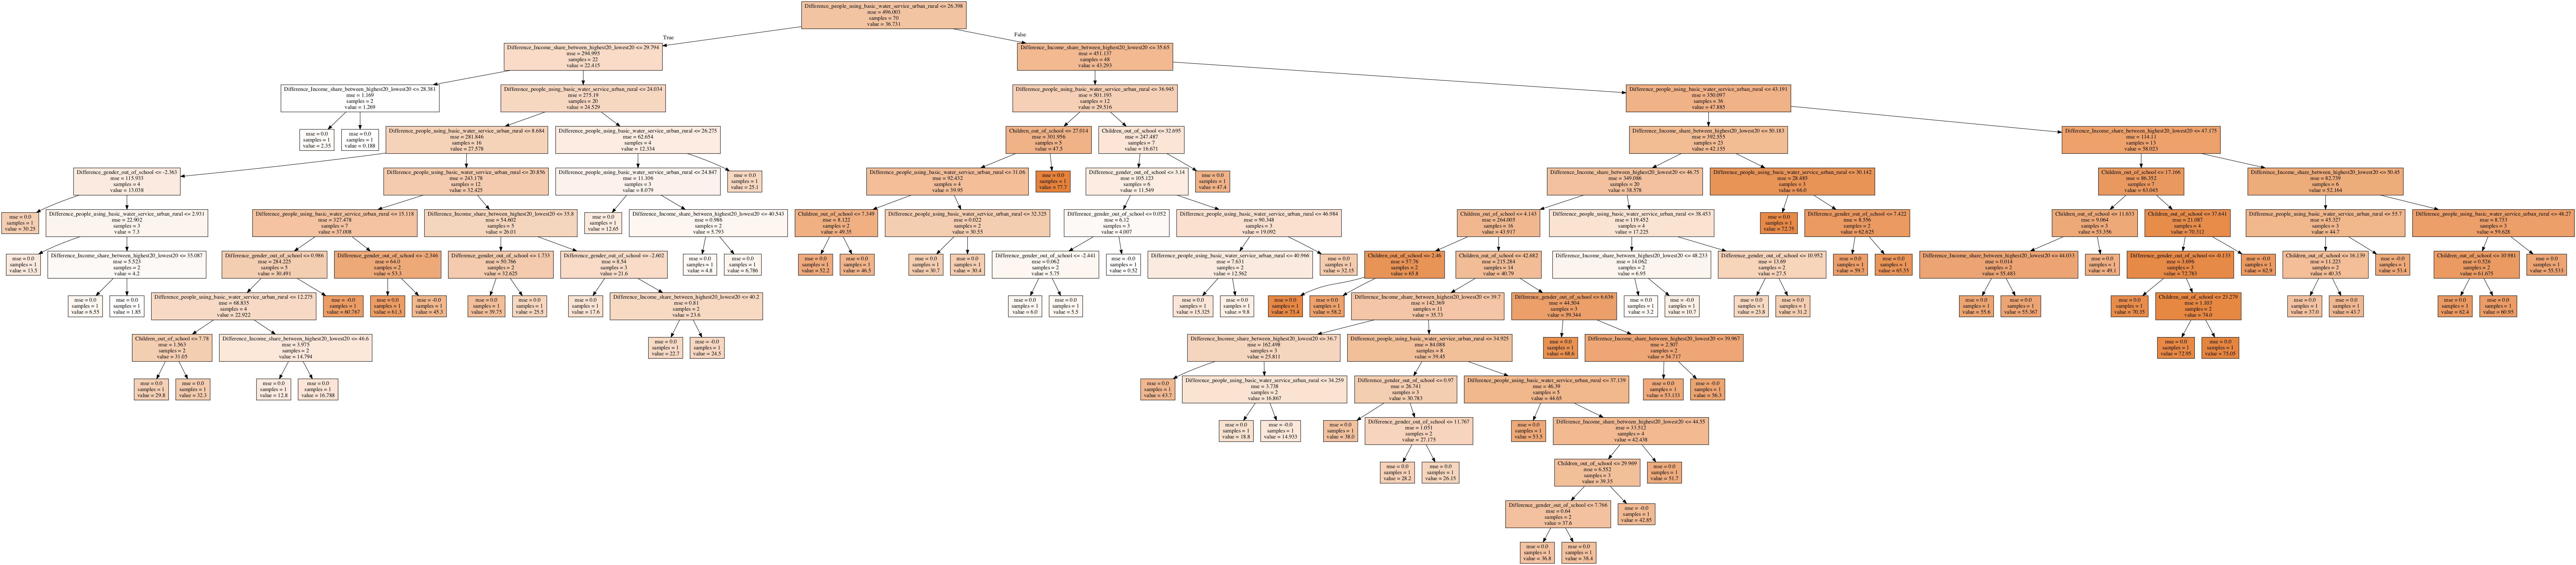

In [122]:
DTRgraph = print_tree(DTpovertyreg, features=X3.columns.values)
Image(DTRgraph.create_png())

In [123]:
DT_predictions_tr=DTpovertyreg.predict(X3_train) # predictions for training set

In [124]:
# How good is this prediction in training?

np.sqrt(np.square(DT_predictions_tr-Y3_train).mean()) #RMSE calculation

0.0

<Mark>Interpretation:</Mark> RMSE is zero; that is, perfect prediction in training! This is called overfitting, and is problematic.

In [125]:
# How good is the model if subjected to variations in the training sample?
cvparam = KFold(5, random_state=13)
scores_mse_DT =  cross_validate(DTpovertyreg, X3_train, Y3_train, cv=cvparam, scoring='neg_mean_squared_error')

In [126]:
scores_mse_DT['test_score']

array([ -899.3500558 , -1303.29655878,  -819.68978782,  -782.33326766,
        -565.34733259])

In [127]:
np.sqrt(scores_mse_DT['test_score'].mean()*-1)

29.56354851045875

<Mark>Interpretation:</Mark> Once we induce some variation in the training sample, by doing a 5-fold split, the RMSE of our decision tree-based prediction has gone down. 
Here, we see that the cross-validation reveals that the model is off by about 29.56%.

In [128]:
# how good is the out-of-training-sample (i.e., the test) prediction of the trained model?

DT_predictions_tt=DTpovertyreg.predict(X3_test)
np.sqrt(np.square(DT_predictions_tt-Y3_test).mean())


28.31720967446171

#### Tuning Decision Tree Model

In [129]:
# set the gridsearch parameters for the decision tree regression
dtr_param_grid={'max_depth':[3,5,7,10], 'max_leaf_nodes':np.arange(2,10)}

In [130]:
# define the gridsearch for the decision tree regression:

dtr_grid_search = GridSearchCV(DTpovertyreg, dtr_param_grid, cv=5, scoring='neg_mean_squared_error')

In [131]:
# Fit the model on training data
dtr_grid_search.fit(X3_train, Y3_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=23,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'max_leaf_nodes': array([2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
        

In [132]:
dtr_grid_search.cv_results_['mean_test_score']

array([-569.60530199, -551.33380683, -585.06751218, -587.85887982,
       -610.92293842, -589.25088251, -593.29591474, -593.29591474,
       -569.60530199, -551.33380683, -585.06751218, -662.23742979,
       -652.0918476 , -711.21520059, -773.6127554 , -762.81220848,
       -569.60530199, -551.33380683, -585.06751218, -662.23742979,
       -652.0918476 , -711.21520059, -773.6127554 , -739.52451893,
       -569.60530199, -551.33380683, -585.06751218, -662.23742979,
       -652.0918476 , -711.21520059, -773.6127554 , -739.52451893])

In [133]:
dtr_grid_search.best_params_

{'max_depth': 3, 'max_leaf_nodes': 3}

In [134]:
dtr_grid_search.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=3, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=23, splitter='best')

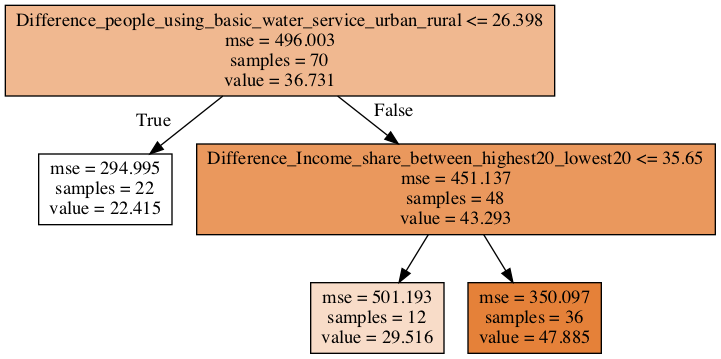

In [135]:
DTRgraph = print_tree(dtr_grid_search.best_estimator_, features=['Difference_gender_out_of_school','Difference_Income_share_between_highest20_lowest20','Difference_people_using_basic_water_service_urban_rural','Children_out_of_school'])
Image(DTRgraph.create_png())

In [136]:
# Get the predicted values and evaluate the model:

DT_predictions_tr=dtr_grid_search.best_estimator_.predict(X3_test) # predictions for test set

In [137]:
# How good is this prediction?

np.sqrt(np.square(DT_predictions_tr-Y3_test).mean()) #RMSE calculation

17.08354253385194

<Mark>Interpretation:</Mark> After fine-tune, this model is off by about 17.08%.

# Random Forest Regression

In [138]:
DTRFpovertyreg=RandomForestRegressor(random_state=23)

In [139]:
# set the gridsearch parameters for the RandomForest regression
dtrf_param_grid={'n_estimators': [10, 15, 20], 'max_depth':[5, 10, 15], \
                 'max_leaf_nodes':np.arange(2,10), 'min_samples_split':[5, 10, 15]}

In [140]:
# define the gridsearch for the RandomForest regression:

dtrf_grid_search = GridSearchCV(DTRFpovertyreg, dtrf_param_grid, cv=5, scoring='neg_mean_squared_error')

In [141]:
# Fit the model on training data
# Since we are using the training portion of the data, we are now "training" our model.
dtrf_grid_search.fit(X3_train, Y3_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=23,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [5, 10, 15],
       

In [142]:
dtrf_grid_search.cv_results_['mean_test_score']

array([-507.49371505, -501.74664336, -494.02610915, -507.49371505,
       -501.74664336, -494.02610915, -507.49371505, -501.74664336,
       -494.02610915, -472.64206853, -466.85456481, -461.20453061,
       -472.64206853, -465.91268196, -460.42126487, -474.52654864,
       -467.12315494, -461.71409423, -463.8752079 , -459.70946276,
       -453.24337324, -474.72868387, -463.46319466, -455.50184783,
       -481.44219985, -467.80022522, -459.34055935, -477.36850243,
       -462.86662699, -447.42572045, -484.25597484, -464.03604285,
       -451.49031626, -479.6569966 , -463.10596809, -452.31210607,
       -499.67095486, -481.30322692, -466.85905042, -494.81006313,
       -469.23420225, -461.71631157, -487.39192446, -469.63912632,
       -457.76964922, -520.87783441, -494.26337797, -480.06531048,
       -500.72313411, -474.57062173, -465.78994454, -487.39192446,
       -469.85950804, -457.91727258, -511.7167617 , -487.35858964,
       -476.45928783, -500.0640375 , -474.3239448 , -465.02721

In [143]:
dtrf_grid_search.best_params_

{'max_depth': 5,
 'max_leaf_nodes': 5,
 'min_samples_split': 5,
 'n_estimators': 20}

In [144]:
dtrf_grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=5,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=23, verbose=0,
                      warm_start=False)

In [145]:
# Get the predicted values and evaluate the training:

DTRF_predictions_tt=dtrf_grid_search.best_estimator_.predict(X3_test) # predictions for test set

In [146]:
# How good is this prediction in test?

np.sqrt(np.square(DTRF_predictions_tt-Y3_test).mean()) #RMSE calculation

16.790901729525118

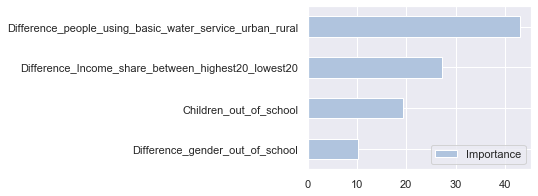

In [147]:
#Getting the importance of features from the best boosting model:

Importance = pd.DataFrame({'Importance':dtrf_grid_search.best_estimator_.feature_importances_*100}, \
                          index=['Difference_gender_out_of_school','Difference_Income_share_between_highest20_lowest20','Difference_people_using_basic_water_service_urban_rural','Children_out_of_school'])
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='lightsteelblue', )
plt.gcf().set_size_inches(4, 3)

<Mark>Interpretation:</Mark> After fine-tune, this model is off by about 16.79%.

#### Boosting Regression

In [148]:
DTboostpovertyreg=GradientBoostingRegressor(random_state=23)

In [149]:
# set the gridsearch parameters for the boosting regression
dtboost_param_grid={'n_estimators': [100, 125, 150], 'max_depth':[3,5,7,10], \
                 'max_leaf_nodes':np.arange(2,10), 'min_samples_split':[5,10,20]}

In [150]:
# define the gridsearch for the boosting model:

dtboost_grid_search = GridSearchCV(DTboostpovertyreg, dtboost_param_grid, cv=5, scoring='neg_mean_squared_error')

In [151]:
# Fit the model on training data
# Since we are using the training portion of the data, we are now "training" our model.
dtboost_grid_search.fit(X3_train, Y3_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter...
                             

In [152]:
dtboost_grid_search.cv_results_['mean_test_score']

array([-527.30344758, -542.02387122, -558.00355597, -527.30344758,
       -542.02387122, -558.00355597, -527.30344758, -542.02387122,
       -558.00355597, -589.81088102, -606.75695536, -627.22919042,
       -570.53705793, -587.90334946, -601.18315875, -605.28280779,
       -637.74210622, -665.25808938, -631.00515963, -642.12423754,
       -643.63736211, -615.7496065 , -631.89999868, -648.85747567,
       -641.93324698, -669.11364864, -686.65327212, -656.53570003,
       -680.12521656, -685.11442682, -631.30751943, -656.1474314 ,
       -667.71366265, -636.60908153, -663.9192087 , -691.01779321,
       -635.77606324, -648.43561549, -655.61774765, -675.39452614,
       -681.56867121, -686.47675048, -641.52352513, -663.07124868,
       -693.57657089, -599.70994473, -601.32676708, -603.15728425,
       -660.65437888, -672.87883027, -674.81365825, -641.52352513,
       -663.07124868, -693.57657089, -593.66773869, -601.97487987,
       -605.06604175, -660.65437888, -673.45177249, -679.27621

In [153]:
dtboost_grid_search.best_params_

{'max_depth': 3,
 'max_leaf_nodes': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [154]:
dtboost_grid_search.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=2,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=23, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [155]:
# Get the predicted values and evaluate the bossting model:

DTboost_predictions_tt=dtboost_grid_search.best_estimator_.predict(X3_test) # predictions for test set

In [156]:
# How good is this prediction?

np.sqrt(np.square(DTboost_predictions_tt-Y3_test).mean()) #RMSE calculation

18.306125431099904

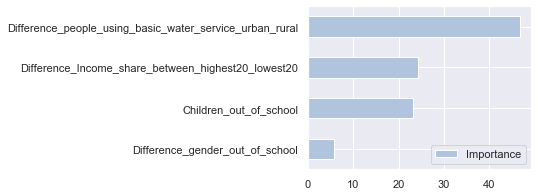

In [157]:
#Getting the importance of features from the best boosting model:

Importance = pd.DataFrame({'Importance':dtboost_grid_search.best_estimator_.feature_importances_*100}, \
                          index=['Difference_gender_out_of_school','Difference_Income_share_between_highest20_lowest20','Difference_people_using_basic_water_service_urban_rural','Children_out_of_school'])
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='lightsteelblue', )
plt.gcf().set_size_inches(4, 3)

<Mark>Interpretation:</Mark> After fine-tune, this model is off by about 18.3%.

## Conclusion
### 1. Linear Regression
#### The 5-fold cross-validation reveals that the fine-tuned model is deviant from reality by about 18.2% on average
### 2. KNN
#### The fine-tuned KNN model's prediction after 5-fold cross validation is deviant from reality by about 15.3% on average
### 3. Decision Tree Regression
#### The fine-tuned Decision Tree model's prediction after 5-fold cross validation is deviant from reality by about 17.1% on average
#### The fine-tuned Random Forest model's prediction after 5-fold cross validation is deviant from reality by about 16.8% on average
#### The fine-tuned Boosting model's prediction after 5-fold cross validation is deviant from reality by about 18.3% on average
### In comparison, the KNN model has the lowest MSE.

#### Also, both Random Forest and Boosting model are indicatign the same order of importance of the independent variables :
#### 'Difference_people_using_basic_water_service_urban_rural'  >
#### 'Difference_Income_share_between_highest20_lowest20' > 
#### 'Children_out_of_school' >
#### 'Difference_gender_out_of_school'

